<a href="https://colab.research.google.com/github/Nikhil9490/ML_Algorithms_Revision/blob/main/Multiple_Linear_Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df = pd.read_csv("economic_index.csv")

In [59]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [60]:
#drop unnecassary column
df.drop(columns = ['Unnamed: 0', 'year', 'month'], axis =1, inplace = True )

In [61]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [62]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


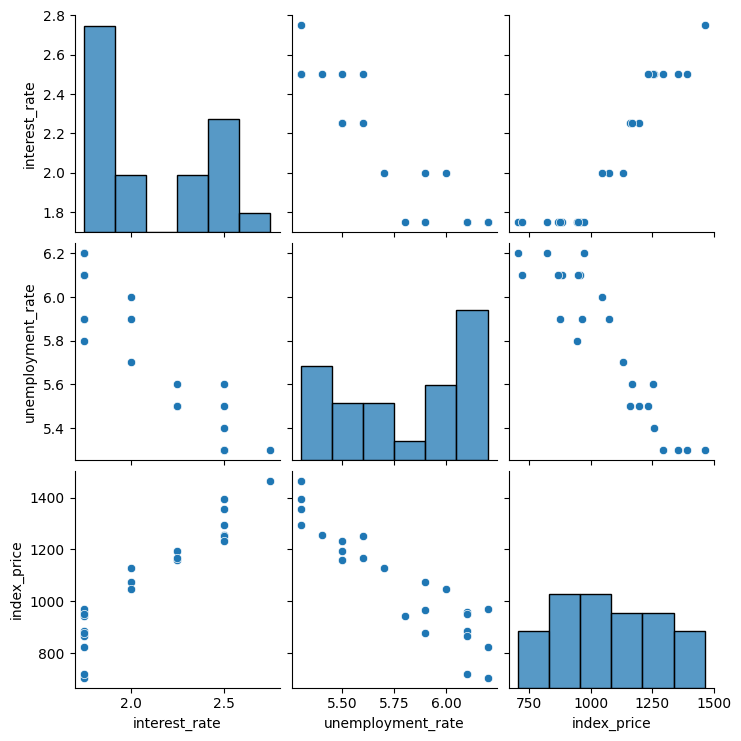

In [63]:
import seaborn as sns
sns.pairplot(df)

we see a few inverse relationships above

In [64]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

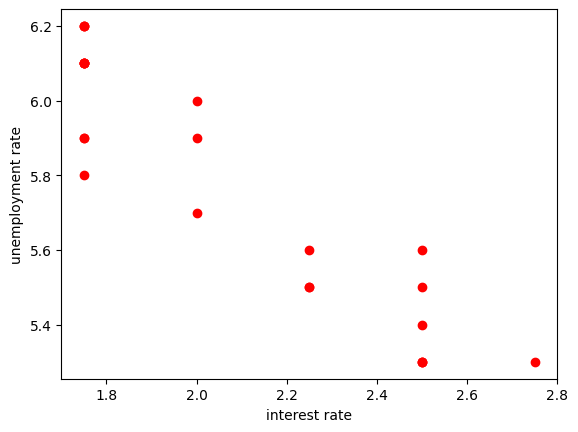

In [65]:
#visualizing datapoints closely

plt.scatter(df['interest_rate'], df['unemployment_rate'], color = 'red')
plt.xlabel("interest rate")
plt.ylabel("unemployment rate")

In [66]:
#independent and dependent features

X= df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [67]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [68]:
Y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

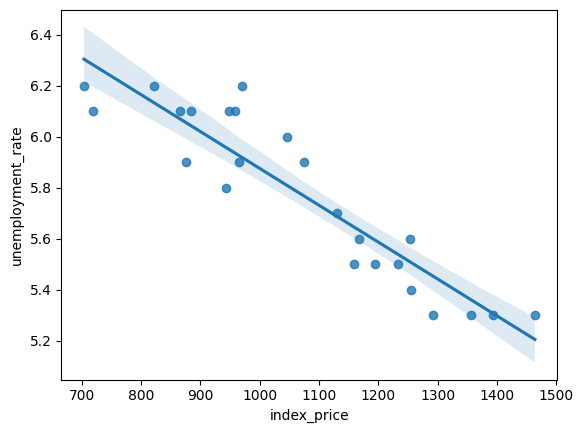

In [70]:
sns.regplot(x= df['index_price'],y= df['unemployment_rate']) #sns regplot works to copare two features

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

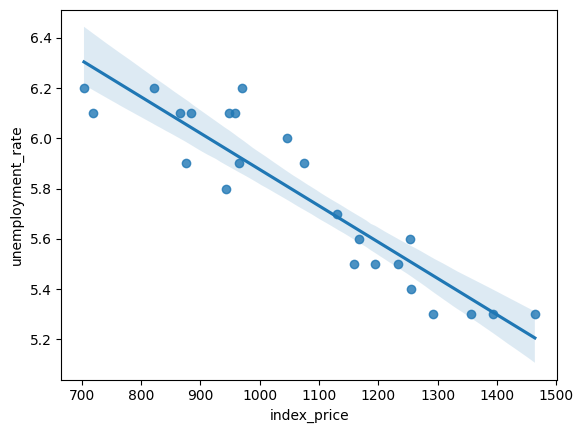

In [71]:
sns.regplot(x= 'index_price',y= 'unemployment_rate', data =df) #just trying another way to declare columns

In [72]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [73]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [74]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()



In [75]:
regression.fit(X_train, Y_train)

LinearRegression()

understanding cross validation.

consider a dataset of 900 rows. if i declare cv= 3
then 900/3 = three sets of 300 rows

so 1st 300 set is test data and remaining data is for train

and goes on

so you will get 3 scores (depending on which scoring you choose)

In [76]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, Y_train, scoring = 'neg_mean_squared_error', cv=3)

In [77]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [78]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [79]:
#prediction

Y_pred = regression.predict(X_test)

In [80]:
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [83]:
score = r2_score(Y_test, Y_pred)
print(score)

0.7591371539010257


In [84]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1) #Adjusted R^2 formula

0.5985619231683761

In [86]:
#OLS method
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 29 Oct 2025   Prob (F-statistic):                       0.754
Time:                        07:21:41   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
print(regression.coef_)

[  88.27275507 -116.25716066]


ASSUMPTIONS


If there is a linear relationship between Y_test and Y_pred, you can assume your model performed well.

If the graph of residuals is normally distributed, then you can assume your model performed well. (means residuals are cenetred around 0, so less difference between y_test and y_pred for most values)

the graph between y_pred and residuals should be uniformly distributed i.e not following any patterns ( I mean obviously, big values and small values, why would they follow a pattern if everything goes right)

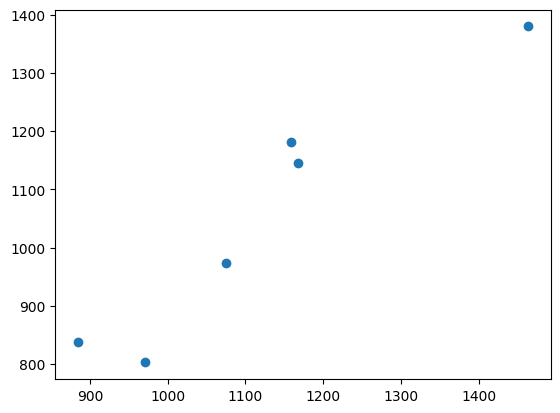

In [89]:
plt.scatter(Y_test, Y_pred)

In [90]:
residuals = Y_test - Y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


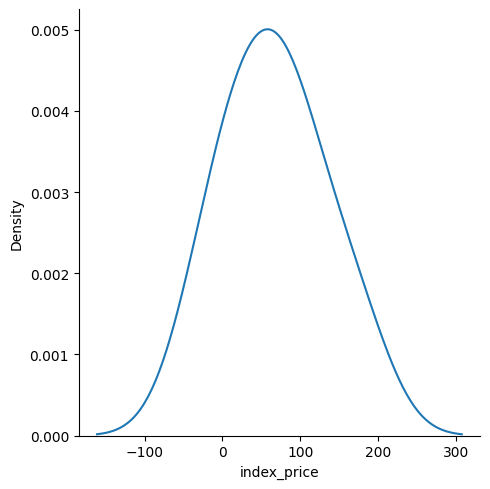

In [92]:
sns.displot(residuals, kind = 'kde') #kernel density estimator

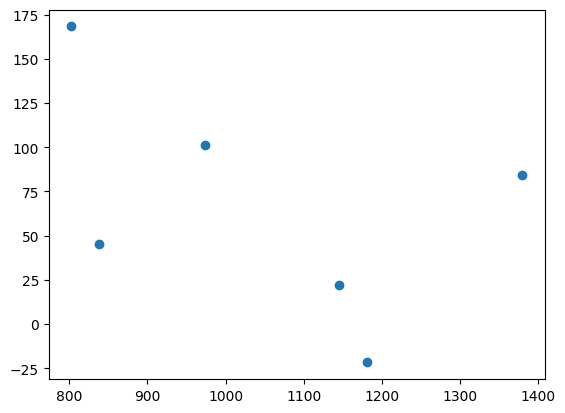

In [94]:
plt.scatter(Y_pred, residuals)